In [1]:
from dataAcquisition import DataAcquisition
from EDA import EDA
from dataPreprocessing import DataPreprocessing
from modelTraining import ModelTraining
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report

%load_ext autoreload
%autoreload 2


In [2]:
data_acquirer = DataAcquisition()

X_train, X_test, y_train, y_test = data_acquirer.acquire_data()
# X_train = pd.read_csv("data/X_train.csv")
# y_train = pd.read_csv("data/y_train.csv")
# X_test = pd.read_csv("data/X_test.csv")
# y_test = pd.read_csv("data/y_test.csv")
X_train.shape

(60000, 784)

# Exploratory Data Analysis

(60000, 784)


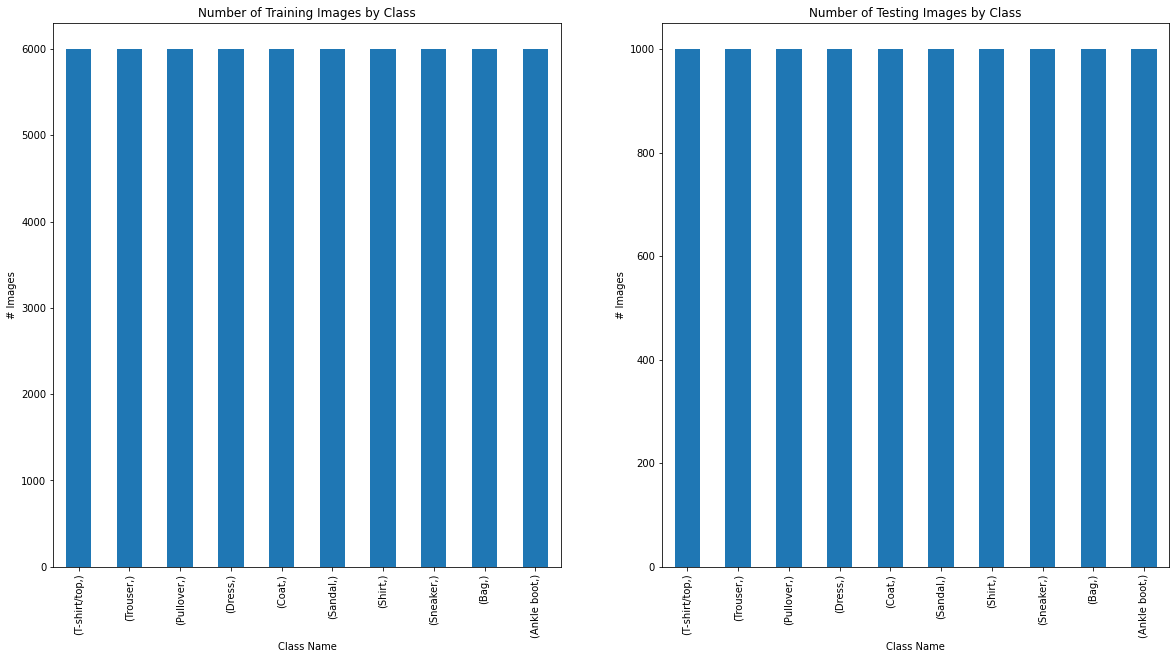

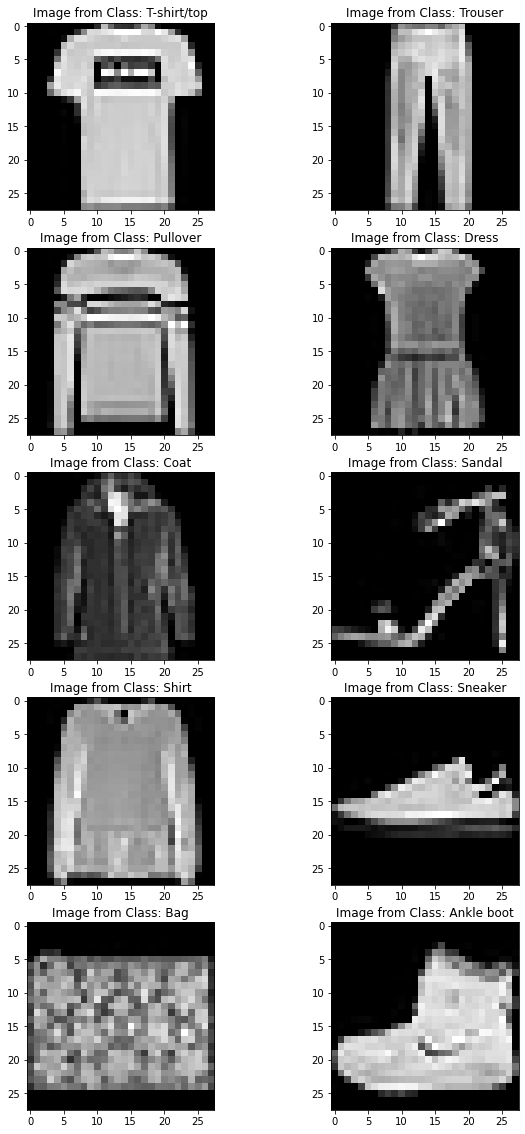

<bound method NDFrame.head of              pixel1        pixel2        pixel3        pixel4        pixel5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

             pixel6        pixel7        pixel8        pixel9       pixel10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394  

In [3]:
eda = EDA()


eda.plot(y_train, y_test, plot_type="classes_bar_plot")
eda.plot(X_train, y_train, plot_type="display_images")
stats = eda.descriptive_statistics(X_train)
print(stats.head)
constant_training_pixels = eda.find_constant_pixels(X_train)
constant_testing_pixels = eda.find_constant_pixels(X_test)
print(f"Constant Pixels in Training Set: {constant_training_pixels}")
print(f"Constant Pixels in Testing Set: {constant_testing_pixels}")

# Data Preprocessing

b: 784, a: 24


<Figure size 720x1440 with 0 Axes>

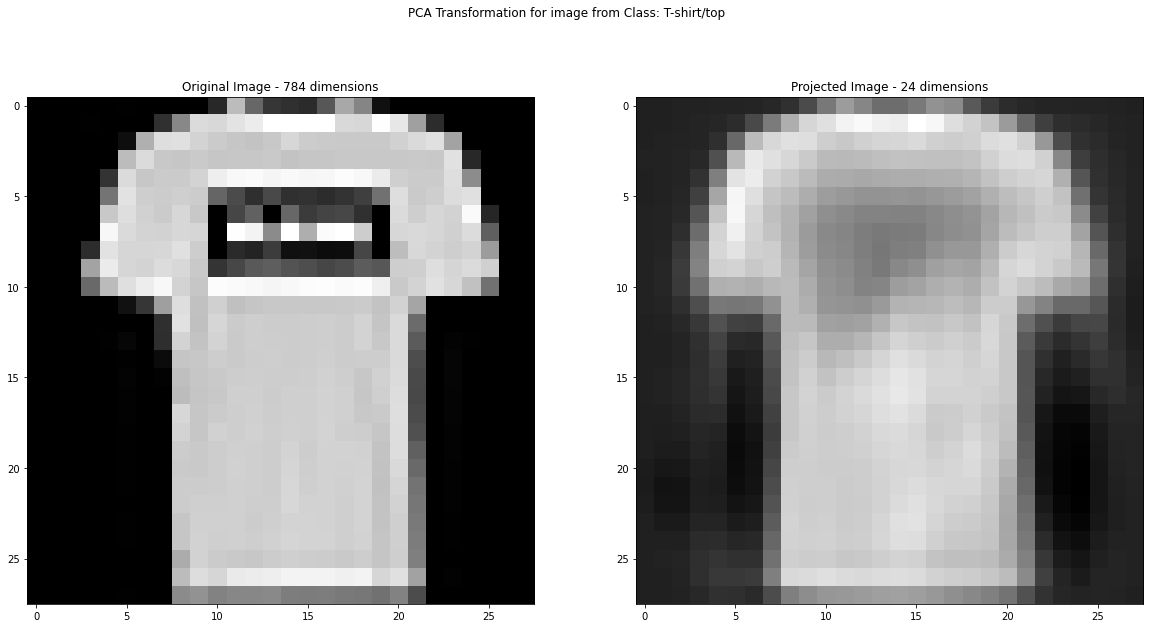

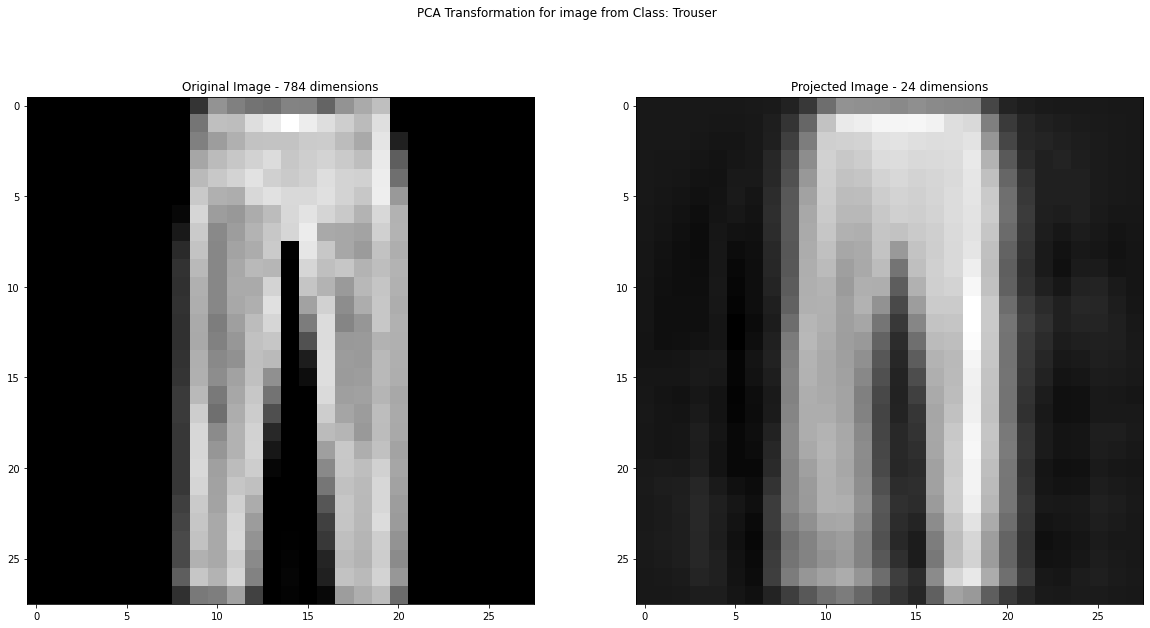

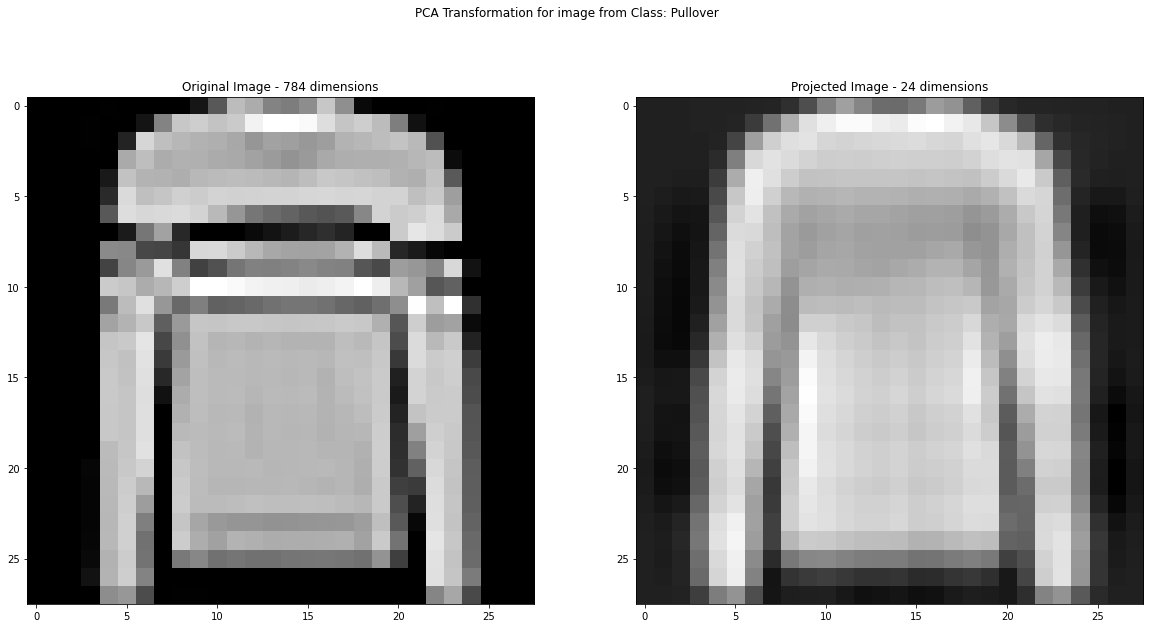

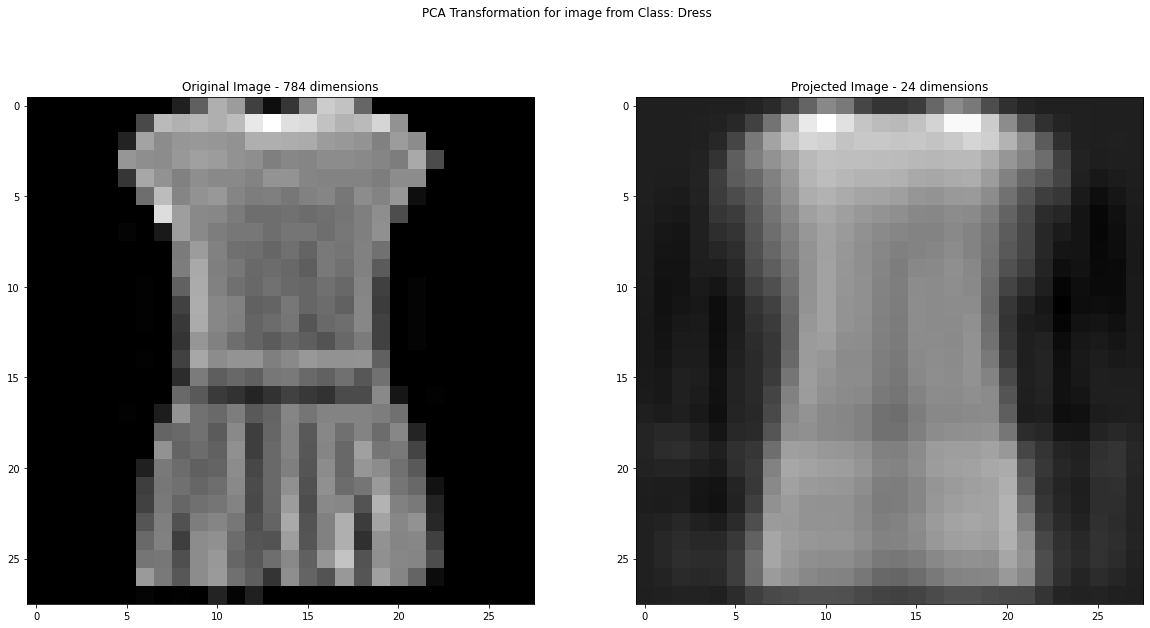

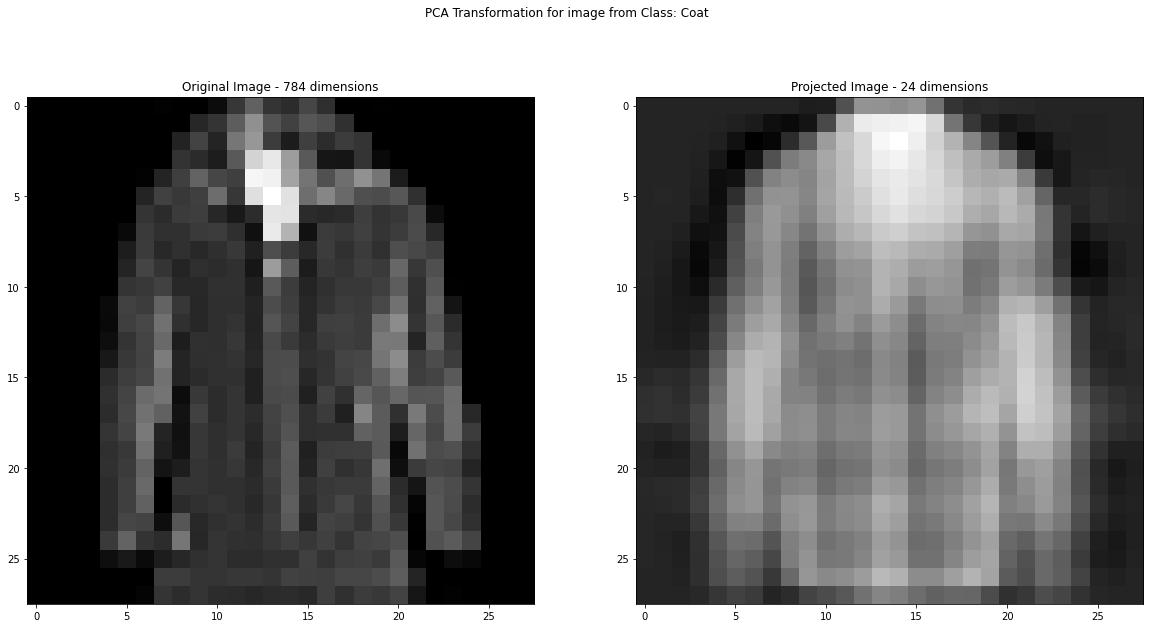

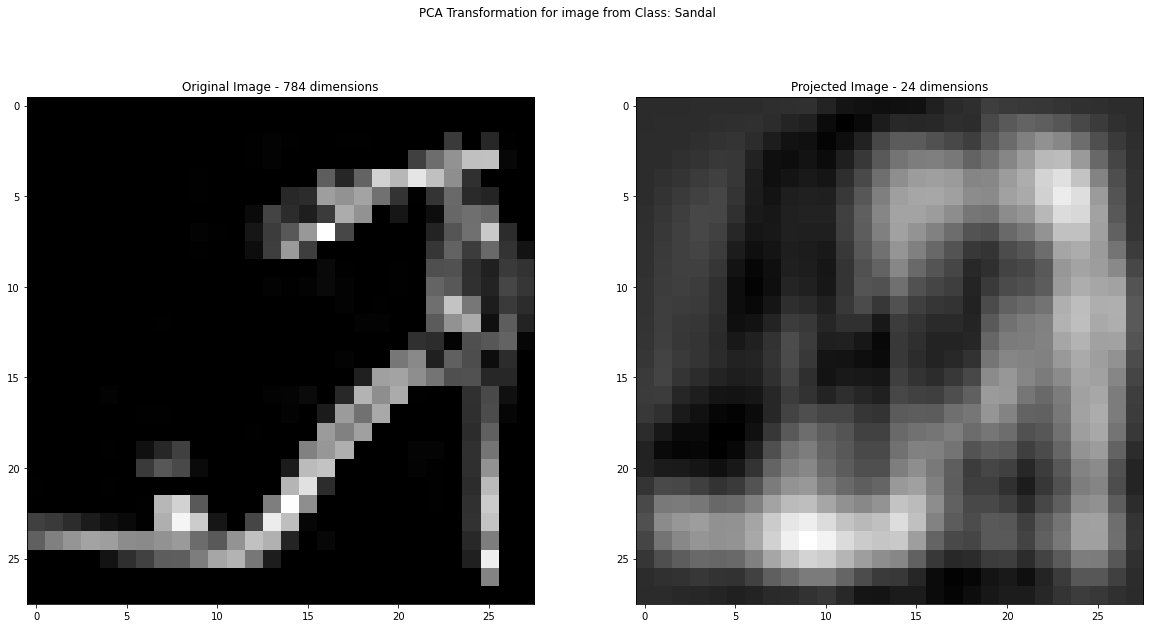

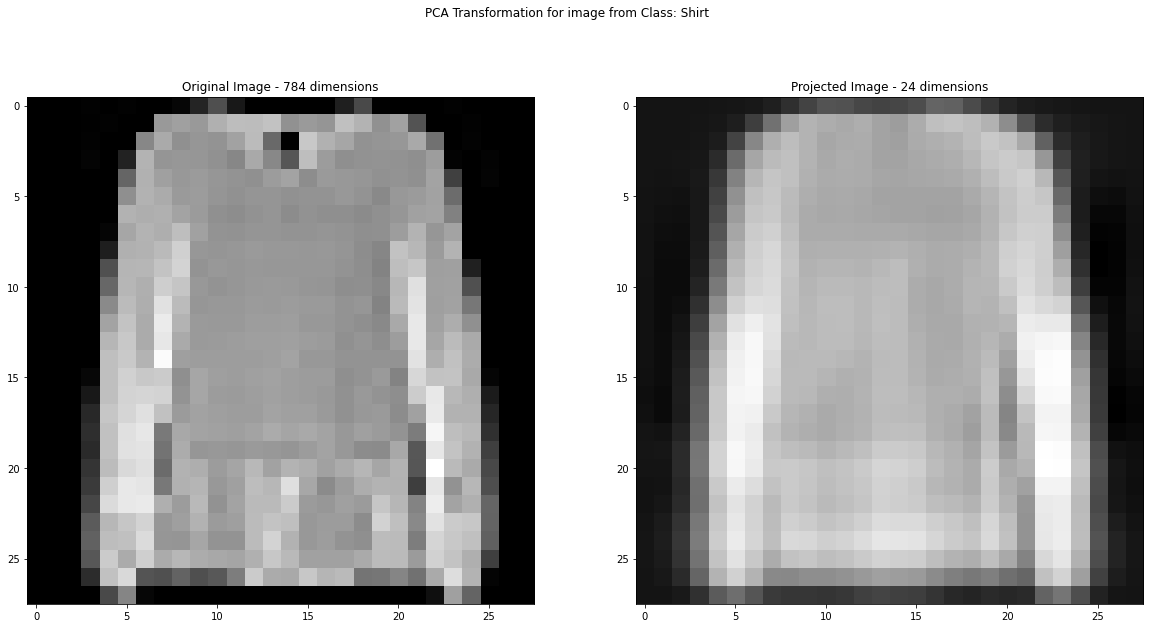

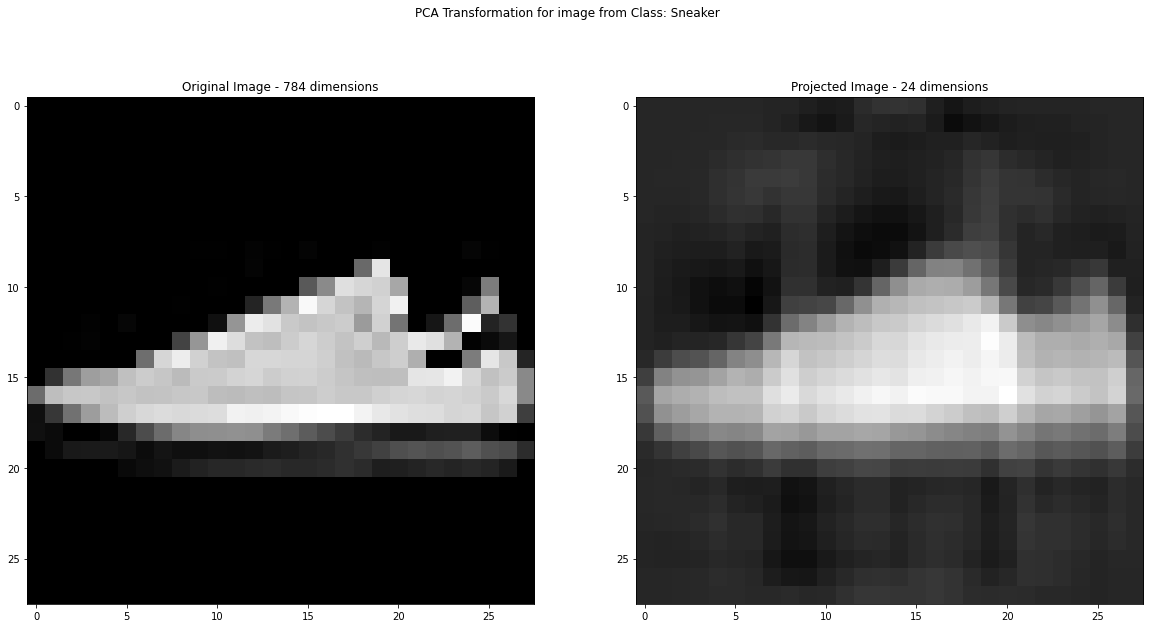

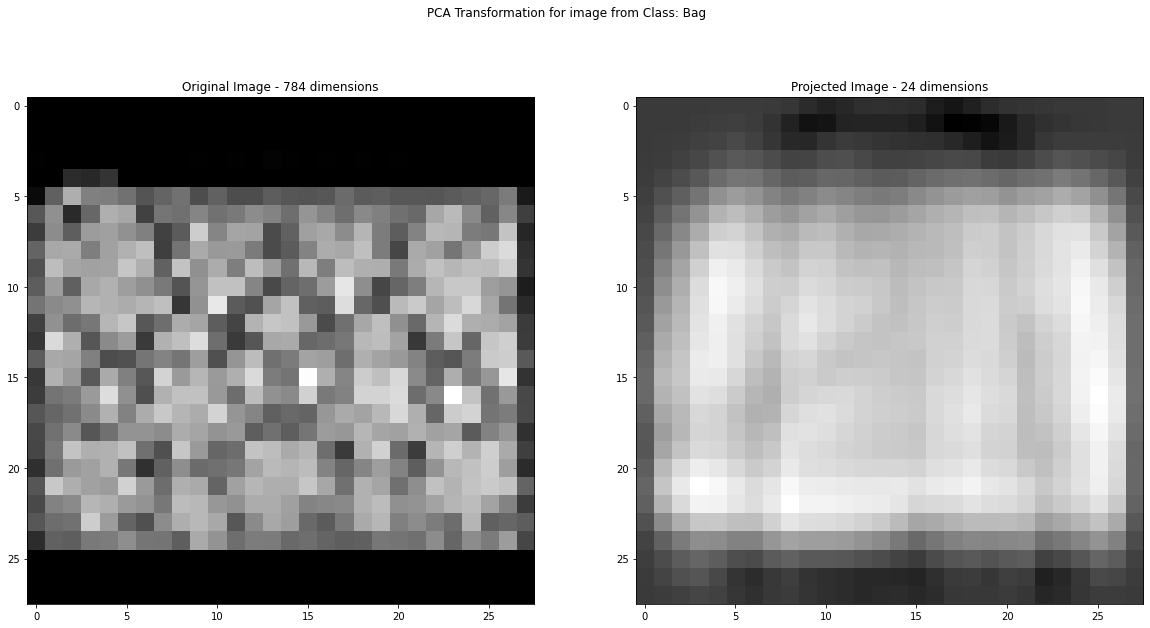

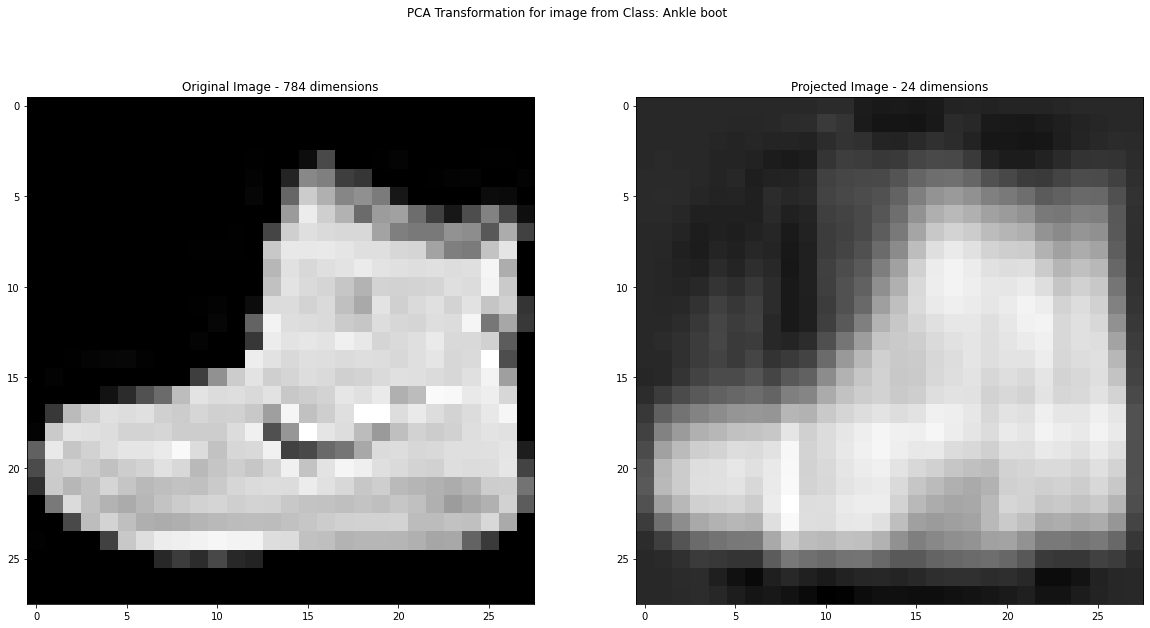

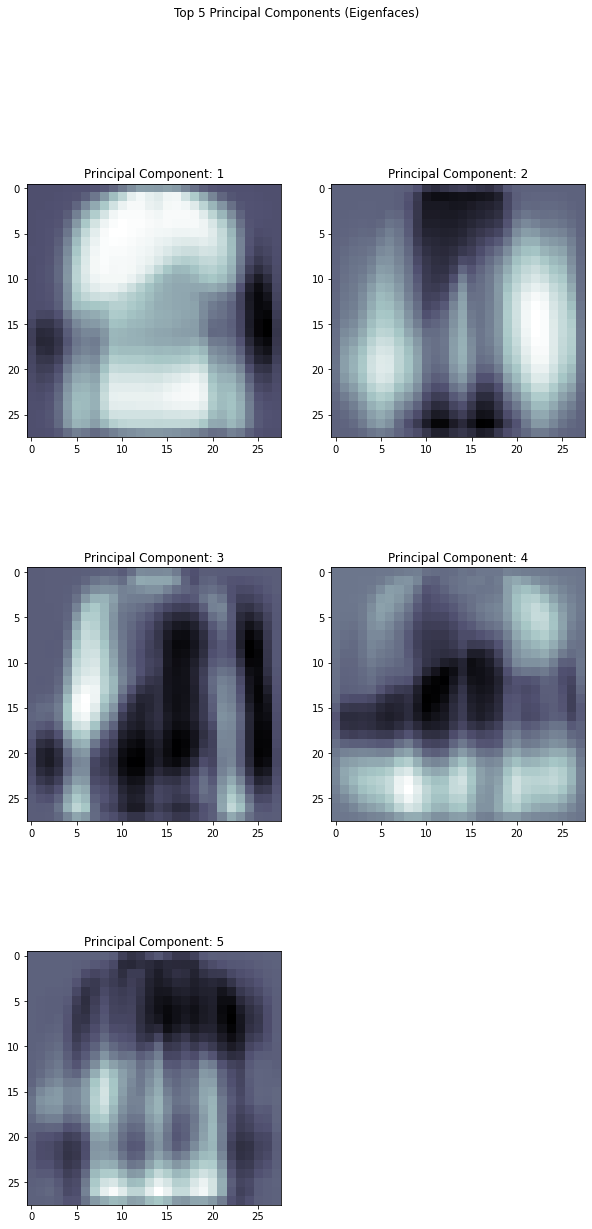

In [4]:
preprocessor = DataPreprocessing()

X_train_pca, X_test_pca = preprocessor.dimensionality_reduction(X_train, X_test, 0.8)
print(f"b: {preprocessor.num_components_before}, a: {preprocessor.num_components_after}")
preprocessor.plot(X_train, X_train_pca, y_train, plot_type='pca_images')
preprocessor.plot(plot_type="eigenfaces")

# Model Training

In [6]:
model_trainer = ModelTraining(X_train_pca, y_train, X_test_pca, y_test)

# nn = model_trainer.neural_network()
# svm = model_trainer.support_vector_machine()
# xgboost = model_trainer.xgboost()

In [7]:
# y_pred = svm.predict(X_test_pca)
# print(classification_report(y_test, y_pred))







Balanced dataset -> chosen metric will be accuracy, no need for F1


Not removing highly correlated features as we would normally because
since the feature-set is composed of pixel-based features, neighbouring
pixels will likely have a high correlation - meaning we would need to
remove a lot which would end up destroying a large chunk of the image.



